![image](Coffee.png)

# Analyze Data with Python
Codecademy Portfolio project

Importing the relevant libraries and importing our csv file into a dataframe:

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

coffee_data = pd.read_csv('synthetic_coffee_health_10000.csv')

# Previewing the first five lines of the dataframe
coffee_data.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


I'm going to analyze the data first, check if there is anything that needs cleaning up, and see if there are any missing values in the columns.

In [2]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In the columns, it's visible the columns that should be binary types are showing incorrectly as integers, but all other columns have the appropriate data types.

Categorical data we have: `Gender`, `Country`, `Sleep_Quality`, `Stress_Level`, `Health_Issues` and `Occupation`<br>
Numerical data there is: `ID`, `Age`, `Coffee_Intake`, `Caffeine_mg`, `Sleep_Hours`, `BMI`, `Heart_Rate` and `Physical_Activity_Hours`
Binary data should be: `Smoking` and `Alcohol Consumption`

So, we need to convert the relevant coluns to binary data type:

In [3]:
coffee_data.Smoking = coffee_data.Smoking.astype(bool)
coffee_data.Alcohol_Consumption = coffee_data.Alcohol_Consumption.astype(bool)
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

As we can see, all columns have now the appropriate type. We can also see that the only column with values missing is `Health_Issues`, but that's expected as those empty values are for the people who have nothing to declare in this aspect. Instead of leaving these values as `NULL`, let's fill them in with the value `No Issues`, as the `NULL` values might bring us issues later on. <br> Column names are appropriate and follow a convention, and the only column that we can drop as it won't be needed is the `ID` column.

In [4]:
# Filling `None` values in the `Health_Issues` column
coffee_data.Health_Issues = coffee_data.Health_Issues.fillna('No Issues')

# Dropping the `ID` column
coffee_data = coffee_data.drop(labels = 'ID', axis = 1)
coffee_data.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,No Issues,Other,False,False
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,No Issues,Service,False,False
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,False,False
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,False,False
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,False,True


#### 1. Initial Insights

Now, let's look at some initial insights from some of the columns:

In [5]:
print(coffee_data.Age.describe(), '\n')
print(coffee_data.Gender.describe(), '\n')
print(coffee_data.Coffee_Intake.describe(), '\n')
print(coffee_data.Sleep_Hours.describe())

count    10000.000000
mean        34.949100
std         11.160939
min         18.000000
25%         26.000000
50%         34.000000
75%         43.000000
max         80.000000
Name: Age, dtype: float64 

count      10000
unique         3
top       Female
freq        5001
Name: Gender, dtype: object 

count    10000.000000
mean         2.509230
std          1.450248
min          0.000000
25%          1.500000
50%          2.500000
75%          3.500000
max          8.200000
Name: Coffee_Intake, dtype: float64 

count    10000.000000
mean         6.636220
std          1.222055
min          3.000000
25%          5.800000
50%          6.600000
75%          7.500000
max         10.000000
Name: Sleep_Hours, dtype: float64


Half of the people in our dataset are under 34 years of age, and the third percentile is at 43 years old, meaning the dataset is mainly made up of younger people.

It's visible that the majority of the participants in the dataset are female, as there are three genders reported, so we'll do a value count to check if there's a big discrepancy between males and females or if it's fairly equal. 

While 25% of the people have 1.5 coffees daily, 50% of them have 2.5, and 75% have up to 3.5 coffees daily. The most daily coffee consumption was more than 8 coffees a day, meaning we have some outliers in that column.

Scientific communities advise adults to have between 7 and 9 hours of sleep daily, and we can see that in our dataset, 75% of the people have less than 7 hours daily.

In [6]:
coffee_data.Gender.value_counts()

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64

From here we can see that while there are fewer people identifying as male than female, I consider the difference small enough that it can be considered that there is relatively equal representation for both male and female genders.

#### 2. Demographics

We can now look at some demographics from our dataset and correlate with the coffee consumption.

##### 2.1. Coffee Consumption by Gender

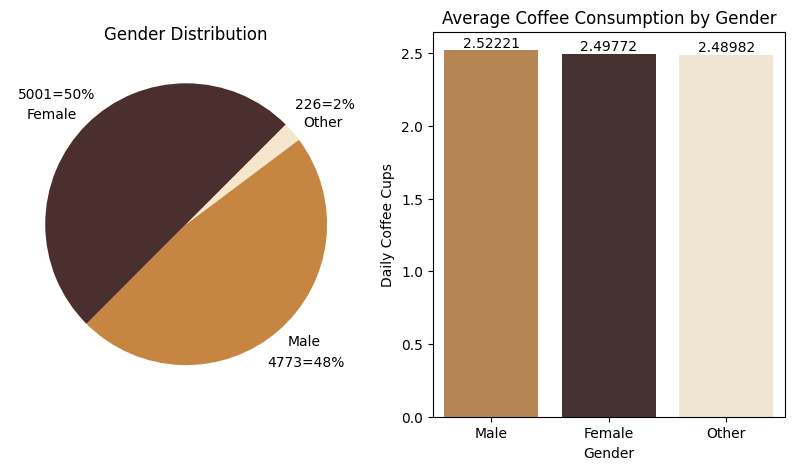

In [7]:
# Defining function to pass the text to the bar charts to use as labels
def label_function(val):
    return f'{val / 100 * len(coffee_data):.0f}={val:.0f}%'

# Defining colour palette to use
c_palette = ['#4B2E2E', '#C68642', '#F5E6CC']

# Defining how the plot will use the colors, assiging to each label
hue_order = ['Female', 'Male', 'Other']

# Defining our figure    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plotting Pie Chart
coffee_data.groupby('Gender').size().plot(kind='pie', autopct=label_function, pctdistance=1.3, startangle = 45, colors = c_palette, ax=ax1)
ax1.set_title('Gender Distribution')

# Plotting Bar Chart
sns.barplot(data = coffee_data, x = 'Gender', y = 'Coffee_Intake', errorbar= None, hue = 'Gender', palette = c_palette, 
            hue_order = hue_order, ax = ax2)
ax2.set_title('Average Coffee Consumption by Gender')
ax2.set_ylabel('Daily Coffee Cups')

# Adding values to the bars on the bar plot
for container in ax2.containers:
    ax2.bar_label(container)

plt.show()

The graphics show that the gender is fairly distributed bewteen male and female, showing no gender bias, and that there is a 2% representation from non binary people. In regards to coffee consumption, the average is fairly similar accross all genders at around 2.5 coffees per day.

##### 2.2. Coffee Consumption by Age

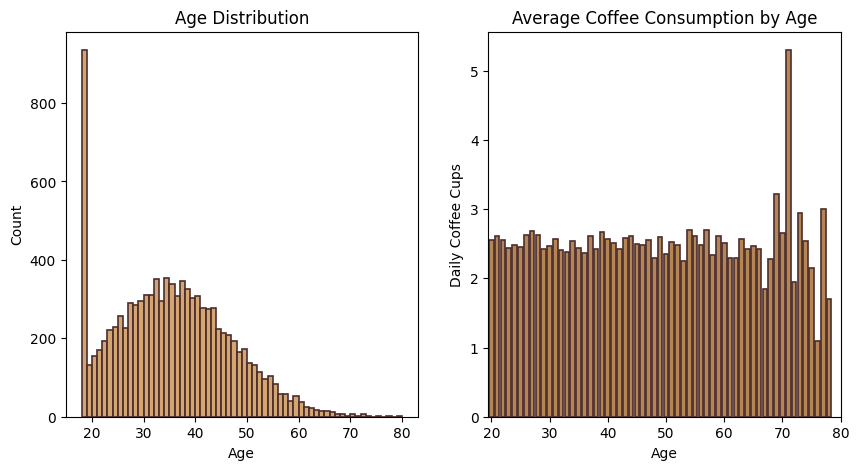

In [8]:
# Defining our figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# plotting the Histogram
sns.histplot(data = coffee_data, x = 'Age', bins = 62, color='#C68642', edgecolor='#4B2E2E', linewidth=1.2, ax= ax1)
ax1.set_title('Age Distribution')

# Plotting the Bar Chart
sns.barplot(data = coffee_data, x = 'Age', y = 'Coffee_Intake', errorbar= None, color= '#C68642', edgecolor='#4B2E2E', linewidth=1.2, ax = ax2)
ax2.set_title('Average Coffee Consumption by Age')
ax2.set_xticks([0,10,20,30,40,50,60])
ax2.set_xticklabels([20,30,40,50,60,70,80])
ax2.set_ylabel('Daily Coffee Cups')

plt.show()

In [9]:
print(f'Number of people who are aged 18: {coffee_data[coffee_data.Age == 18].Age.count()}')

Number of people who are aged 18: 935


In our dataset, there is a big number of 18-year-olds, compared to the rest of the population, but after that, it follows the pattern of a right-skewed uniform distribution, having the most users being around 35 years old.<br>
As for the average daily consumption, it remains fairly similar across the full graph, only having bigger divergence from 65 years old upwards, where the population gets slimmer.

##### 2.3. Coffee Consumption by Country

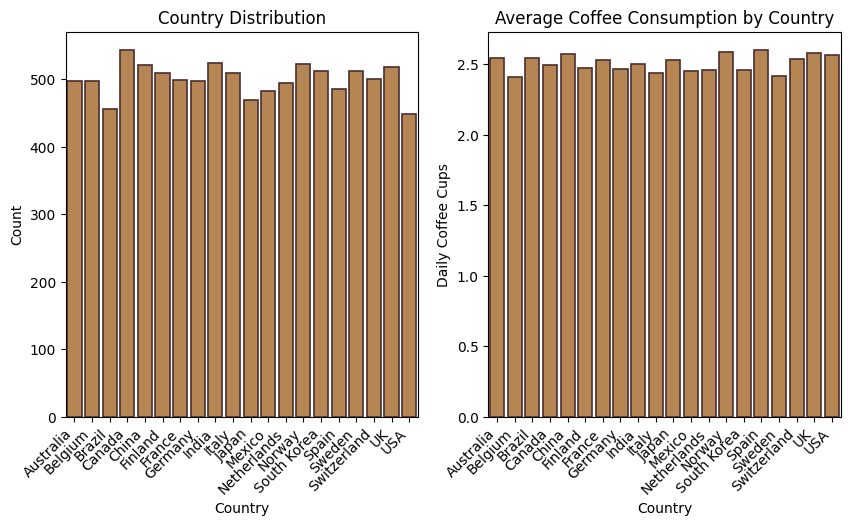

In [10]:
# Get unique countries sorted alphabetically
order = sorted(coffee_data['Country'].unique())

# Defining our figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plotting the Count Chart (histogram for categorical count of values)
sns.countplot(data=coffee_data, x='Country', order=order, color='#C68642', edgecolor='#4B2E2E', linewidth=1.2, ax = ax1)
ax1.set_title('Country Distribution')
ax1.set_ylabel('Count')
ax1.set_xlabel('Country')
ax1.tick_params(axis = 'x', labelrotation = 45)
# Setting all the labels as right-aligned
for label in ax1.get_xticklabels():
   label.set_horizontalalignment('right')

# Plotting our Bar Chart
ax2.set_title('Average Coffee Consumption by Country')
sns.barplot(data = coffee_data, x = 'Country', y = 'Coffee_Intake', order = order, errorbar= None, color= '#C68642', 
            edgecolor='#4B2E2E', linewidth=1.2, ax = ax2)
ax2.set_ylabel('Daily Coffee Cups')
ax2.tick_params(axis = 'x', labelrotation = 45)
# Setting all the labels as right-aligned
for label in ax2.get_xticklabels():
   label.set_horizontalalignment('right')
    
plt.show()

All the 20 countries in the dataset had a similar number of representatives in the dataset, with around 500 people each.<br> Again, the average daily coffee consumption remains fairly similar, around 2.5 cups, the same value as by Age or Gender.

##### 2.4. Coffee Consumption by Occupation

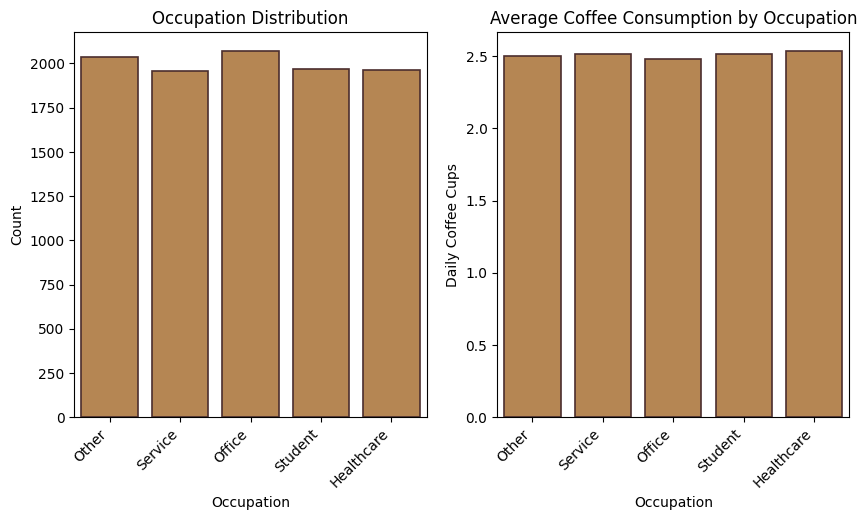

In [11]:
# Defining our figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plotting the Count Chart (histogram for categorical count of values)
sns.countplot(data=coffee_data, x='Occupation', color='#C68642', edgecolor='#4B2E2E', linewidth=1.2, ax = ax1)
ax1.set_title('Occupation Distribution')
ax1.set_ylabel('Count')
ax1.set_xlabel('Occupation')
ax1.tick_params(axis = 'x', labelrotation = 45)
# Setting all the labels as right-aligned
for label in ax1.get_xticklabels():
   label.set_horizontalalignment('right')

# Plotting our Bar Chart
ax2.set_title('Average Coffee Consumption by Occupation')
sns.barplot(data = coffee_data, x = 'Occupation', y = 'Coffee_Intake', errorbar= None, color= '#C68642', edgecolor='#4B2E2E', linewidth=1.2, ax = ax2)
ax2.set_ylabel('Daily Coffee Cups')
ax2.tick_params(axis = 'x', labelrotation = 45)
# Setting all the labels as right-aligned
for label in ax2.get_xticklabels():
   label.set_horizontalalignment('right')
    
plt.show()

Again, our data has a very similar number of people per occupation, with around 2000 people per sector, and the average number of daily coffees consumed is at the 2.5 cups mark again.

#### 3. Correlations

Let's now look into some correlations derived from our data.

##### 3.1. Coffee Consumption Correlations
We'll start by analyzing how coffee consumption relates to other data.

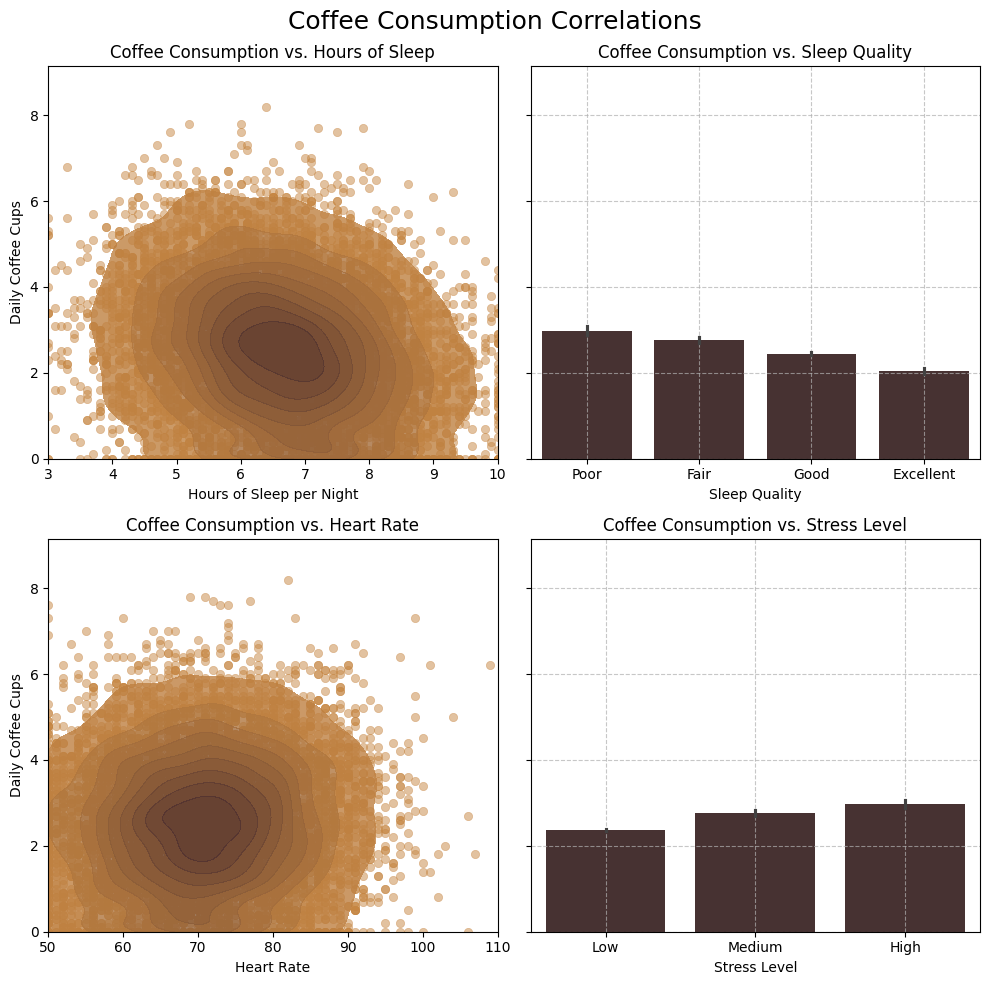

In [12]:
# Define a coffee gradient from light to dark
coffee_cmap = mcolors.LinearSegmentedColormap.from_list("coffee", ['#C68642', '#4B2E2E'])

# Defining our figure
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10), sharey = True) # Dividing the subplots into two cells, so it runs faster

fig.suptitle('Coffee Consumption Correlations', size = 18)
#fig.subplots_adjust(top=0.95)

# Plotting the first graph
sns.scatterplot(data=coffee_data, x='Sleep_Hours', y='Coffee_Intake', color = '#C68642', alpha = 0.5, edgecolor = None, ax = ax[0,0])
sns.kdeplot(data=coffee_data, x='Sleep_Hours', y='Coffee_Intake', fill=True, cmap=coffee_cmap, ax = ax[0,0], alpha = 0.8)
ax[0,0].set_title('Coffee Consumption vs. Hours of Sleep')
ax[0,0].set_ylabel('Daily Coffee Cups')
ax[0,0].set_xlabel('Hours of Sleep per Night')
ax[0,0].set_xlim([3,10]) # Defining the limit on the x axis

# Defining the order to show the sleep quality
order = ['Poor', 'Fair', 'Good', 'Excellent']

# Plotting the second graph
sns.barplot(data = coffee_data, x = 'Sleep_Quality', y = 'Coffee_Intake', ax = ax[0, 1], color ='#4B2E2E', order = order)
ax[0,1].set_title('Coffee Consumption vs. Sleep Quality')
ax[0,1].set_ylabel('Daily Coffee Cups')
ax[0,1].set_xlabel('Sleep Quality')
ax[0,1].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the third graph
sns.scatterplot(data=coffee_data, x='Heart_Rate',y='Coffee_Intake', color = '#C68642', alpha = 0.5, edgecolor = None, ax = ax[1,0])
sns.kdeplot(data = coffee_data, x = 'Heart_Rate', y = 'Coffee_Intake', ax = ax[1, 0], fill = True, cmap=coffee_cmap, alpha = 0.8)
ax[1,0].set_title('Coffee Consumption vs. Heart Rate')
ax[1,0].set_ylabel('Daily Coffee Cups')
ax[1,0].set_xlabel('Heart Rate')
ax[1,0].set_xlim([50,110]) # Defining the limit on the x axis

# Plotting the fourth graph
sns.barplot(data = coffee_data, x = 'Stress_Level', y = 'Coffee_Intake', ax = ax[1, 1], color ='#4B2E2E')
ax[1,1].set_title('Coffee Consumption vs. Stress Level')
ax[1,1].set_ylabel('Daily Coffee Cups')
ax[1,1].set_xlabel('Stress Level')
ax[1,1].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

plt.ylim(0) # Force the Plots to start at 0 on the y axis
plt.tight_layout()
plt.show()

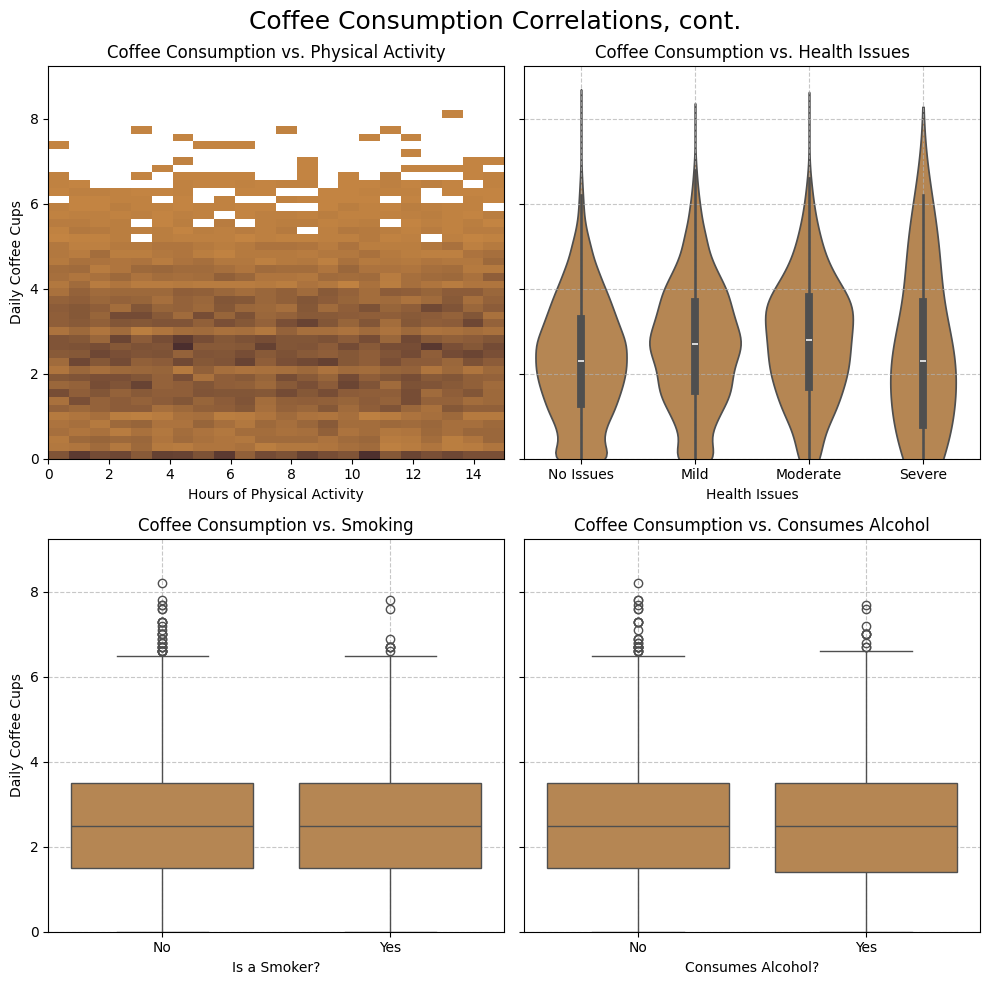

In [13]:
# Defining our figure
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10), sharey = True) # Dividing the subplots into two cells, so it runs faster

fig.suptitle('Coffee Consumption Correlations, cont.', size = 18)
fig.subplots_adjust(top=0.95)

# Plotting the fifth graph
sns.histplot(data=coffee_data, x='Physical_Activity_Hours', y='Coffee_Intake', cmap=coffee_cmap,ax = ax[0,0])
ax[0,0].set_title('Coffee Consumption vs. Physical Activity')
ax[0,0].set_ylabel('Daily Coffee Cups')
ax[0,0].set_xlabel('Hours of Physical Activity')
ax[0,0].set_xlim([0,15]) # Defining the limit on the x axis

# Plotting the sixth graph
sns.violinplot(data = coffee_data, x = 'Health_Issues', y = 'Coffee_Intake', ax = ax[0, 1], color ='#C68642')
ax[0,1].set_title('Coffee Consumption vs. Health Issues')
ax[0,1].set_ylabel('Daily Coffee Cups')
ax[0,1].set_xlabel('Health Issues')
ax[0,1].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the seventh graph
sns.boxplot(data=coffee_data, x='Smoking', y='Coffee_Intake',color = '#C68642', ax = ax[1,0])
ax[1,0].set_title('Coffee Consumption vs. Smoking')
ax[1,0].set_ylabel('Daily Coffee Cups')
ax[1,0].set_xlabel('Is a Smoker?')
ax[1,0].set_xticks([0, 1])  # positions for 'No' and 'Yes', need to be defined so we can change the name of the labels on next line
ax[1,0].set_xticklabels(['No', 'Yes'])
ax[1,0].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the eigth graph
sns.boxplot(data = coffee_data, x = 'Alcohol_Consumption', y = 'Coffee_Intake', ax = ax[1, 1], color ='#C68642')
ax[1,1].set_title('Coffee Consumption vs. Consumes Alcohol')
ax[1,1].set_ylabel('Daily Coffee Cups')
ax[1,1].set_xlabel('Consumes Alcohol?')
ax[1,1].set_xticks([0, 1])  # positions for 'No' and 'Yes', need to be defined so we can change the name of the labels on next line
ax[1,1].set_xticklabels(['No', 'Yes'])
ax[1,1].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

plt.ylim(0) # Force the Plots to start at 0 on the y axis
plt.tight_layout()
plt.show()

From this analysis we can see that most of the individuals in our dataset are sleeping under the recommended sleep time (between 7 and 9 hours per night), and the majority of the people sleep between 6 and 7 hours when having 2 to 4 coffees per day. There are some dispersed dots, but I don't think the discrepancy is big enough to label them outliers. From this data, even though you cn notice a slight decline towards the bottom right, there doesn't seem to be a relation between the number of coffee cups drunk per day and the number of hours slept at night, as there are people who reported drinking 6 or more daily cups of coffee and still sleeping 7 or more hours per day.

When comparing the average coffee consumption with the sleep quality, we can see that an increase in coffee consumption directly correlates to a decrease in sleep quality, meaning that possibly drinking more coffee during the day has an impact on sleep quality.

In relation to heart rate, the highest density of our population sits within the normal heart rate values (60-90 bpm), with a high density of users drinking 2 to 4 coffees a day. Again, there doesn't seem to be a correlation between these two variables, as we have people reporting drinking 
6 or more cups a day appearing accross all values of the heart rate values.

Looking at stress level, we can see it slightly increases as the daily coffee consumption increases as well, meaning that there might be a possible causation there.

In the case of physical activity reported, we can see that the majority of people across all hours reported drinking an average of 2 to 3 cups of coffee per day, but higher numbers of coffees drunk appear independently of the physical activity time reported, so no correlation can be assumed here.

While the median of people who have severe health issues is just above 2 coffees per day, quite similar to the median of those who have no issues, it's noticeable that the density for higher amounts of coffee drunk is higher than those that have lower health issues. Interesting is also the fact that, while the median stays relatively the same in all health categories, the density range gets wider as the health risks increase, except for severe health risks, where the highest density is lower than the other categories, but the density stays wider in higher amounts of coffee drunk as well. Maybe it could be due to other factors, like people who already know they have more health issues being advised by their clinicians to drink less coffee, or even other factors.

When analyzing the fact that of wether a person is a smoker or consumes alcohol as well or not, all the quartiles are very similar, with similar maximum values and some similar outliers as well.

##### 3.2. Sleep Quality correlations
We'll now investigate if sleep quality is impacted by other factors.

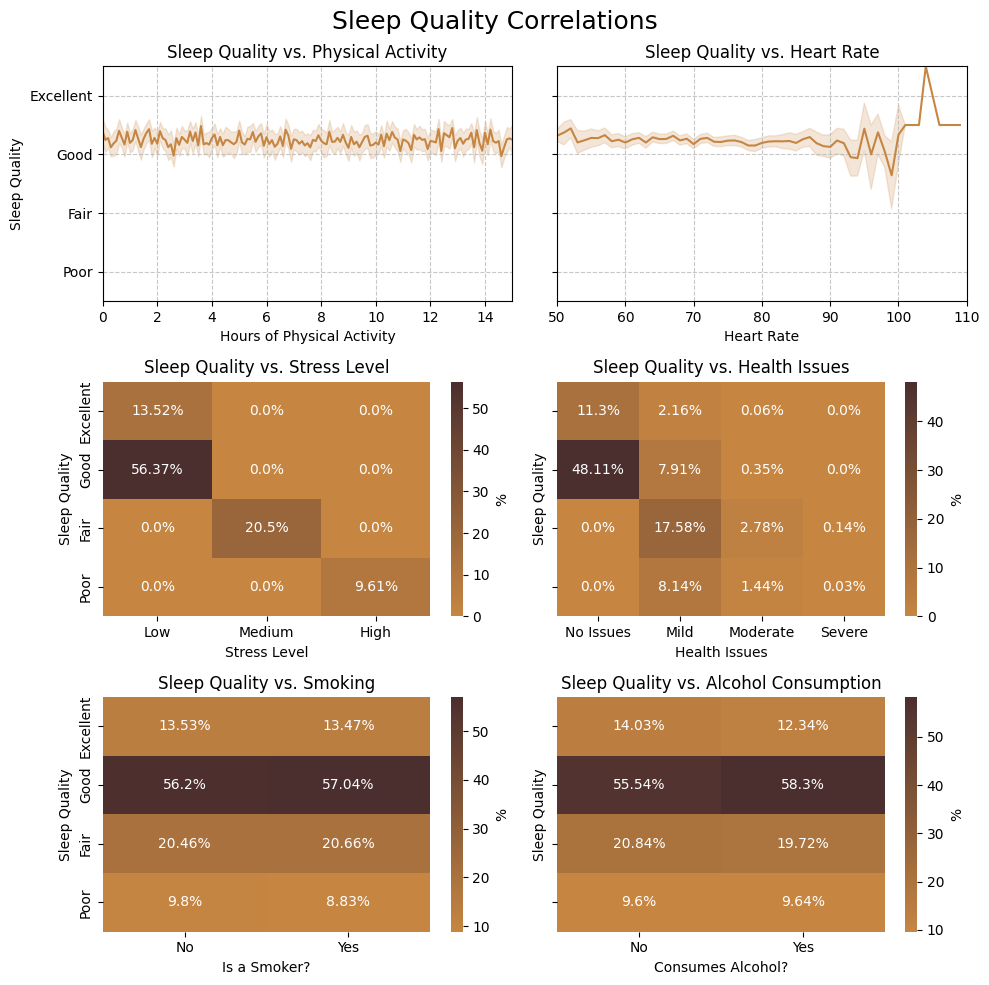

In [14]:
# Defining the figure
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10), sharey = True)

fig.suptitle('Sleep Quality Correlations', size = 18)

# Defining our categorical categories order
coffee_data['Sleep_Quality'] = pd.Categorical(coffee_data['Sleep_Quality'], categories=['Excellent', 'Good', 'Fair', 'Poor'], ordered=True)
coffee_data['Stress_Level'] = pd.Categorical(coffee_data['Stress_Level'], categories=['Low', 'Medium', 'High'], ordered=True)
coffee_data['Health_Issues'] = pd.Categorical(coffee_data['Health_Issues'], categories=['No Issues', 'Mild', 'Moderate', 'Severe'], ordered=True)

# Plotting the first graph
sns.lineplot(data=coffee_data, x='Physical_Activity_Hours', y='Sleep_Quality', ax = ax[0,0], color = '#C68642')
ax[0,0].set_title('Sleep Quality vs. Physical Activity')
ax[0,0].set_ylabel('Sleep Quality')
ax[0,0].set_xlabel('Hours of Physical Activity')
ax[0,0].set_xlim([0,15]) # Defining the limit on the x axis
ax[0,0].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the second graph
sns.lineplot(data=coffee_data, x='Heart_Rate', y='Sleep_Quality', ax = ax[0,1], color = '#C68642')
ax[0,1].set_title('Sleep Quality vs. Heart Rate')
ax[0,1].set_ylabel('Sleep Quality')
ax[0,1].set_xlabel('Heart Rate')
ax[0,1].set_xlim([50,110]) # Defining the limit on the x axis
ax[0,1].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the third graph
# Defining a contingency table with the values from both categories Sleep Quality and Stress Level
ct = pd.crosstab(coffee_data.Sleep_Quality, coffee_data.Stress_Level)
ct_norm = ct.div(len(coffee_data.Sleep_Quality), axis=0)*100 # Making the values percentages
labels = ct_norm.round(2).astype(str) + '%' # making labels show the percentage and the '%' sign inside each tile on the first graph

sns.heatmap(ct_norm, annot=labels, fmt="", cmap=coffee_cmap,  cbar_kws={'label': '%'}, xticklabels=ct_norm.columns, 
            yticklabels=ct_norm.index, ax = ax[1,0])
ax[1,0].set_title('Sleep Quality vs. Stress Level')
ax[1,0].set_ylabel('Sleep Quality')
ax[1,0].set_xlabel('Stress Level')

# Plotting the fourth graph
# Defining a contingency table with the values from both categories Sleep Quality and Health Issues
ct = pd.crosstab(coffee_data.Sleep_Quality, coffee_data.Health_Issues)
ct_norm = ct.div(len(coffee_data.Sleep_Quality), axis=0)*100 # Making the values percentages
labels = ct_norm.round(2).astype(str) + '%' # making labels show the percentage and the '%' sign inside each tile on the first graph

sns.heatmap(ct_norm, annot=labels, fmt="", cmap=coffee_cmap,  cbar_kws={'label': '%'}, xticklabels=ct_norm.columns, 
            yticklabels=ct_norm.index, ax = ax[1,1])
ax[1,1].set_title('Sleep Quality vs. Health Issues')
ax[1,1].set_ylabel('Sleep Quality')
ax[1,1].set_xlabel('Health Issues')

# Plotting the fifth graph
# Defining a contingency table with the values from both categories Sleep Quality and Health Issues
ct = pd.crosstab(coffee_data.Sleep_Quality, coffee_data.Smoking)
ct_norm = ct.div(ct.sum(axis=0), axis=1) * 100   # Making the values percentages
labels = ct_norm.round(2).astype(str) + '%' # making labels show the percentage and the '%' sign inside each tile on the first graph


sns.heatmap(ct_norm, annot=labels, fmt="", cmap=coffee_cmap,  cbar_kws={'label': '%'}, xticklabels=ct_norm.columns, 
            yticklabels=ct_norm.index, ax = ax[2,0])
ax[2,0].set_title('Sleep Quality vs. Smoking')
ax[2,0].set_ylabel('Sleep Quality')
ax[2,0].set_xlabel('Is a Smoker?')
ax[2,0].set_xticklabels(['No', 'Yes'])

# Plotting the sixt graph
# Defining a contingency table with the values from both categories Sleep Quality and Health Issues
ct = pd.crosstab(coffee_data.Sleep_Quality, coffee_data.Alcohol_Consumption)
ct_norm = ct.div(ct.sum(axis=0), axis=1) * 100 # Making the values percentages
labels = ct_norm.round(2).astype(str) + '%' # making labels show the percentage and the '%' sign inside each tile on the first graph

sns.heatmap(ct_norm, annot=labels, fmt="", cmap=coffee_cmap,  cbar_kws={'label': '%'}, xticklabels=ct_norm.columns, 
            yticklabels=ct_norm.index, ax = ax[2,1])
ax[2,1].set_title('Sleep Quality vs. Alcohol Consumption')
ax[2,1].set_ylabel('Sleep Quality')
ax[2,1].set_xlabel('Consumes Alcohol?')
ax[2,1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

Heart rate and physical activity don't seem to have much impact on sleep quality, even though there's more oscillation in people with heart rates over 90 bpm, but that might be due to the smaller population who fit that criterion.

When comparing sleep quality to stress levels or health issues, most people with low stress levels or no health issues have good or excellent sleep, but as the stress or health issues increase, it's visible that the sleep  quality decreases.

While looking for correlations with users who are smokers or consume alcohol as well, we can see that the percentages for people who reported not doing those things are very similar to the values for people who reported doing them, so we can assume that there is no real correlation there.

##### 3.3. Health Issues Correlations

Let's investigate if health issues seem to be affected by other variables.

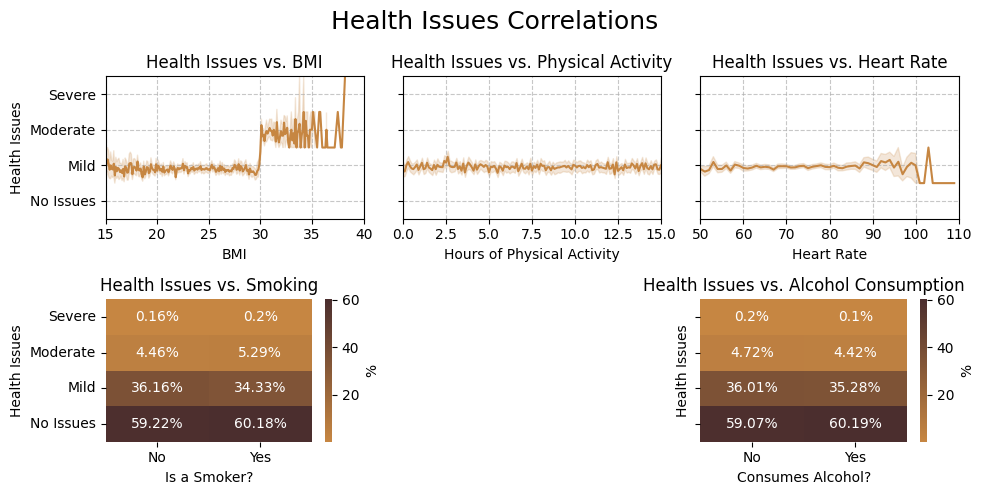

In [16]:
# Defining the figure
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 5), sharey = True)

fig.suptitle('Health Issues Correlations', size = 18)

coffee_data['Health_Issues'] = pd.Categorical(coffee_data['Health_Issues'], categories=['Severe', 'Moderate', 'Mild', 'No Issues'], ordered=True)

# Plotting the first graph
sns.lineplot(data=coffee_data, x='BMI', y='Health_Issues', ax = ax[0,0], color = '#C68642', orient = 'x')
ax[0,0].set_title('Health Issues vs. BMI')
ax[0,0].set_ylabel('Health Issues')
ax[0,0].set_xlabel('BMI')
ax[0,0].set_xlim([15,40]) # Defining the limit on the x axis
ax[0,0].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the second graph
sns.lineplot(data=coffee_data, x='Physical_Activity_Hours', y='Health_Issues', ax = ax[0,1], color = '#C68642')
ax[0,1].set_title('Health Issues vs. Physical Activity')
ax[0,1].set_ylabel('Health Issues')
ax[0,1].set_xlabel('Hours of Physical Activity')
ax[0,1].set_xlim([0,15]) # Defining the limit on the x axis
ax[0,1].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the third graph
sns.lineplot(data=coffee_data, x='Heart_Rate', y='Health_Issues', ax = ax[0,2], color = '#C68642')
ax[0,2].set_title('Health Issues vs. Heart Rate')
ax[0,2].set_ylabel('Health Issues')
ax[0,2].set_xlabel('Heart Rate')
ax[0,2].set_xlim([50,110]) # Defining the limit on the x axis
ax[0,2].grid(True, linestyle='--', alpha=0.7) # Adds the grid on the subplot to make it easier to see the changes in the line

# Plotting the fourth graph
# Defining a contingency table with the values from both categories Sleep Quality and Health Issues
ct = pd.crosstab(coffee_data.Health_Issues, coffee_data.Smoking)
ct_norm = ct.div(ct.sum(axis=0), axis=1) * 100   # Making the values percentages
labels = ct_norm.round(2).astype(str) + '%' # making labels show the percentage and the '%' sign inside each tile on the first graph


sns.heatmap(ct_norm, annot=labels, fmt="", cmap=coffee_cmap,  cbar_kws={'label': '%'}, xticklabels=ct_norm.columns, 
            yticklabels=ct_norm.index, ax = ax[1,0])
ax[1,0].set_title('Health Issues vs. Smoking')
ax[1,0].set_ylabel('Health Issues')
ax[1,0].set_xlabel('Is a Smoker?')
ax[1,0].set_xticklabels(['No', 'Yes'])

# Plotting the fifth graph
# Defining a contingency table with the values from both categories Sleep Quality and Health Issues
ct = pd.crosstab(coffee_data.Health_Issues, coffee_data.Alcohol_Consumption)
ct_norm = ct.div(ct.sum(axis=0), axis=1) * 100   # Making the values percentages
labels = ct_norm.round(2).astype(str) + '%' # making labels show the percentage and the '%' sign inside each tile on the first graph


sns.heatmap(ct_norm, annot=labels, fmt="", cmap=coffee_cmap,  cbar_kws={'label': '%'}, xticklabels=ct_norm.columns, 
            yticklabels=ct_norm.index, ax = ax[1,2])
ax[1,2].set_title('Health Issues vs. Alcohol Consumption')
ax[1,2].set_ylabel('Health Issues')
ax[1,2].set_xlabel('Consumes Alcohol?')
ax[1,2].set_xticklabels(['No', 'Yes'])

# Making sixth plot invisible
ax[1,1].set_visible(False)

plt.tight_layout()
plt.show()

While looking at health issues correlations, we can see that BMI might have a role in increased health issues, as there is an increase of health issues as the BMI increases. 

For heart rate and physical activity reported, the health issues remain relatively the same throughout the entire graphs, meaning there might not be a huge relation between those values. 

While looking at smokers or people who consume alcohol, the percentages of health issues are very similar to the percentages of people who don't do those things, meaning there doesn't seem to be a correlation there.

#### 4. Hypothesis Tests

Now that we had a chance to make some visualizations about our variables, we can test some hypotheses that appeared from those visualizations and some that were already present before.

##### 4.1. Is Coffee Consumption Related to Hours Slept?

From our visualization there doesn't seem to be a direct correlation between these two variables, which surprised me, so we'll run a 2-sample T-test on the population who doesn't drink coffee and those who do and see if their average sleep hours are significantly different.<br>
- Null Hypothesis: The average sleep time between those two groups is the same.
- Alternate Hypothesys: Both groups have different average sleep times.

In [25]:
# Creating the subgroups that we are comparing
coffee_drinkers = coffee_data.loc[coffee_data.Coffee_Intake > 0, 'Sleep_Hours']
non_coffee_drinkers = coffee_data.loc[coffee_data.Coffee_Intake == 0, 'Sleep_Hours']

# Applying the 2 Sample T-test hypothesis
t_stat, pval = ttest_ind(coffee_drinkers, non_coffee_drinkers)
print('P-value:', pval)


P-value: 3.1692855010392664e-12


As the p-value is many times lower than 0.05, we can safely say that the Null Hypothesis has been rejected and that the mean hours of sleep for those who drink coffee is significantly different from the one for those who don't drink coffee.

In [18]:
print('Average Sleep hours for Coffee Drinkers: ', drinkers.mean(), '\n')
print('Average Sleep hours for Non-Coffee Drinkers: ', nondrinkers.mean())

Average Sleep hours for Coffee Drinkers:  6.615536962507943 

Average Sleep hours for Non-Coffee Drinkers:  6.986200716845879


Even though at a first glance the means for both groups seem very similar, we can mathematically say that with our p-value (~3e-12), there’s a statistically significant difference in average sleep hours between coffee drinkers and non-drinkers, supporting strong evidence that coffee intake and sleep are related.

##### 4.2. Does Coffee Consumption Affect Sleep Quality?

From the graph shown in 3.1. Coffee Consumption Correlations about sleep quality, it seems that as the more coffee a person consumes a day, the worse the sleep quality. Let's put that theory to the test. As we have a categorical column and a numerical column, I'll use an ANOVA test:
- Null Hypothesis: The average coffee intake is similar across all sleeping quality.
- Alternate Hypothesis: The average of at least one group is different from the others.

In [19]:
# Defining a table that contains lists for each of our sleep quality values
qual_groups = [coffee_data.loc[coffee_data.Sleep_Quality == qual, 'Coffee_Intake'] for qual in coffee_data.Sleep_Quality.unique()]

# Applying the ANOVA test
fstat, pval =f_oneway(*qual_groups) # Using *before the list unpacks the list

print('P-value:', p_value)

P-value: 3.1692855010392664e-12


As the P-value is less than 0.05, we can safely say that the Null Hypothesis can be rejected and that there's at least one group that has a different average coffee intake. Let's make use of the Tukey range test to determine the difference between the datasets:

In [20]:
# Calling the  Tukey Range test
# Results = pairwise_tukeyhsd(data, labels, p_val desired)
tukey = pairwise_tukeyhsd(endog=coffee_data.Coffee_Intake, groups=coffee_data.Sleep_Quality, alpha=0.05)

print(tukey)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj   lower   upper  reject
-------------------------------------------------------
Excellent   Fair    0.715    0.0  0.5865  0.8435   True
Excellent   Good   0.3977    0.0  0.2866  0.5088   True
Excellent   Poor   0.9304    0.0  0.7756  1.0851   True
     Fair   Good  -0.3173    0.0 -0.4119 -0.2227   True
     Fair   Poor   0.2153 0.0007  0.0719  0.3588   True
     Good   Poor   0.5326    0.0  0.4046  0.6606   True
-------------------------------------------------------


From this dataset we can see  that all comparisons  on the dataset reject the Null Hypothesis, providing strong evidence that coffee intake differs significantly across all sleep quality groups. Since all differences are statistically significant (very small p-values), it's unlikely these differences are due to chance. While there might be other factors that contribute to poorer sleep, our data indicates higher coffee consumption tends to correspond with poorer sleep quality.

##### 4.3. Does Coffee Consumption Have Any Effect On Stress Level?

From our earlier visualizations, we can assume that coffee consumption has an impact on stress levels, so let's do an ANOVA test to confirm.
- Null Hypothesys: The average coffee intake is similar across all stress levels.
- Alternate Hypothesis: The average of at least one group is different from the others.
We can also perform a Turey Range Tests to see the difference between the different stress levels.

In [21]:
# Defining a table that contains lists for each of our stress levels
stress_groups = [coffee_data.loc[coffee_data.Stress_Level == level, 'Coffee_Intake'] for level in coffee_data.Stress_Level.unique()]

# Applying the ANOVA test
fstat, pval =f_oneway(*stress_groups) # Using *before the list unpacks the list

print('P-value:', p_value)

tukey = pairwise_tukeyhsd(endog=coffee_data.Coffee_Intake, groups=coffee_data.Stress_Level, alpha=0.05)

print(tukey)

P-value: 3.1692855010392664e-12
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.6096    0.0 -0.7252 -0.4939   True
  High Medium  -0.2153 0.0004 -0.3467  -0.084   True
   Low Medium   0.3942    0.0  0.3098  0.4786   True
----------------------------------------------------


As the P-value is much lower than 0.05, we can safely say that coffee intake has an impact on stress levels, and from looking at the Tukey Range Test results, we can see that the average is very different for all pairings, meaning that the data strongly suggests a relationship between coffee intake and stress levels.

##### 4.4. Is Coffee Consumption Correlated To Health Issues?

We can now investigate the correlation between coffee intake and health issues. As one of the values is numerical and one is categorical, we'll still use the ANOVA test.
- Null Hypothesis: The average coffee intake is similar across all health issues.
- Alternate Hypothesis: The average of at least one group is different from the others.
We can also perform a Turey Range Tests to see the difference between the different health issues categories.

In [22]:
# Defining a table that contains lists for each of our Health Issues categories
health_groups = [coffee_data.loc[coffee_data.Health_Issues == grade, 'Coffee_Intake'] for grade in coffee_data.Health_Issues.unique()]

# Applying the ANOVA test
fstat, pval =f_oneway(*health_groups) # Using *before the list unpacks the list

print('P-value:', p_value)

tukey = pairwise_tukeyhsd(endog=coffee_data.Coffee_Intake, groups=coffee_data.Health_Issues, alpha=0.05)

print(tukey)

P-value: 3.1692855010392664e-12
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
     Mild  Moderate   0.1127 0.3886 -0.0703  0.2956  False
     Mild No Issues  -0.3131    0.0 -0.3915 -0.2347   True
     Mild    Severe  -0.2021 0.9391 -1.1025  0.6983  False
 Moderate No Issues  -0.4257    0.0 -0.6045  -0.247   True
 Moderate    Severe  -0.3148  0.813 -1.2294  0.5998  False
No Issues    Severe    0.111  0.989 -0.7886  1.0105  False
----------------------------------------------------------


We can see that coffee intake is related to health issues, but not in the way you might expect. Instead of more coffee implying more issues, the data shows that people reporting no issues actually consume more coffee than those with mild or moderate issues.

##### 4.5. Does Smoking Or Drinking Alcohol Impact Coffee Consumption?

In our boxplots it looks like both smoking and drinking alcohol have very similar graphs to those who do not partake in those activities; let's build some hypotheses to test this. As `Smoking` and `Alcohol_Consumption` are both binary columns and `Coffee_Consumption` is a numerical column, we can run a 2-sample T-test for both smokers and alcohol drinkers.
- Null Hypothesis: Smokers/alcohol drinkers have similar average coffee consumption to those who don't.
- Alternate Hypothesis: Both populations have different average coffee consumption.

In [26]:
# Creating the subgroups that we are comparing
smokers = coffee_data.loc[coffee_data.Smoking == True, 'Coffee_Intake']
non_smokers = coffee_data.loc[coffee_data.Smoking == False, 'Coffee_Intake']
alc_drinkers = coffee_data.loc[coffee_data.Smoking == True, 'Coffee_Intake']
non_alc_drinkers = coffee_data.loc[coffee_data.Smoking == False, 'Coffee_Intake']

# Running the test for smokers
tstat, pval_s = ttest_ind(smokers, non_smokers)
# Running the test for alcohol drinkers
tstat, pval_a = ttest_ind(alc_drinkers, non_alc_drinkers)

print('Smokers P-value:', pval_s)
print('Drinkers P-value:', pval_a)

Smokers P-value: 0.2785912466437349
Drinkers P-value: 0.2785912466437349


As the P-values for both categories are higher than 0.05, the difference in average coffee drunk by smokers or alcohol drinkers compared to the average of those who don't is not statistically significant enough to say that partaking in those activities has an impact on the amount of coffee drunk.

##### 4.6. Does Physical Activity Affect Sleep Quality?

We've determined, through our hypothesis that coffee consumption has an effect on sleeping quality. What about physical activity? 
Let's test if the amount of physical activity affects sleep quality. <br>
We can run an ANOVA test with a Tukey Range test to check where the differences lie.
- Null Hypothesis: The average across all sleep quality tiers is similar.
- Alternate Hypothesis: There is at least one sleep quality average that is different from the other means.

In [29]:
# Defining a table that contains lists for each of our Health Issues categories
slp_qual_groups = [coffee_data.loc[coffee_data.Sleep_Quality == grade, 'Physical_Activity_Hours'] for grade in coffee_data.Sleep_Quality.unique()]

# Applying the ANOVA test
fstat, pval =f_oneway(*slp_qual_groups) # Using *before the list unpacks the list

print('P-value:', p_value)

tukey = pairwise_tukeyhsd(endog=coffee_data.Physical_Activity_Hours, groups=coffee_data.Sleep_Quality, alpha=0.05)

print(tukey)

P-value: 3.1692855010392664e-12
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj   lower  upper  reject
------------------------------------------------------
Excellent   Fair     0.07 0.9671 -0.3185 0.4585  False
Excellent   Good   0.1262 0.7689 -0.2096  0.462  False
Excellent   Poor   0.2508 0.5137 -0.2171 0.7186  False
     Fair   Good   0.0562  0.958 -0.2298 0.3422  False
     Fair   Poor   0.1807 0.7071 -0.2528 0.6142  False
     Good   Poor   0.1245 0.8417 -0.2624 0.5115  False
------------------------------------------------------


As the P-value given by the ANOVA test is much lower than 0.05, we can say that physical activity is related to sleep quality, but through Tukey's Range test, we can see that no single pair differs strongly enough to be considered statistically significant. This might mean that even though there is some effect that physical activity has on sleep quality, the effect is not big enough to be relevant.

##### 4.7. Is Sleep Quality Related To Stress Levels Or Health Issues?

We can also investigate if stress levels or health issues have an impact on sleep quality. To do this, we can run a Chi Square test for each comparison.
 - Null Hypothesis: There is no association between sleep quality and stress/health issues.
 - Alternate Hypothesis: There is some correlation between quality of sleep and stress/health issues.

In [33]:
# Create contingency table for stress levels
ct_SL = pd.crosstab(coffee_data.Sleep_Quality, coffee_data.Stress_Level)

# Create contingency table for health issues
ct_HI = pd.crosstab(coffee_data.Sleep_Quality, coffee_data.Health_Issues)

# Run chi-squared test for health issues
chi2, p_SL, dof, expected = chi2_contingency(ct_SL)

# Run chi-squared test for health issues
chi2, p_HI, dof, expected = chi2_contingency(ct_HI)

print(f'P-value for Sleep Quality vs. Stress Level: {p_SL}\nP-Value for Sleep Quality vs. Health Issues: {p_HI}')

Stress_Level   High   Low  Medium
Sleep_Quality                    
Excellent         0  1352       0
Fair              0     0    2050
Good              0  5637       0
Poor            961     0       0
Health_Issues  Mild  Moderate  Severe
Sleep_Quality                        
Excellent       216         6       0
Fair           1758       278      14
Good            791        35       0
Poor            814       144       3
P-value for Sleep Quality vs. Stress Level: 0.0
P-Value for Sleep Quality vs. Health Issues: 4.202065234987676e-17


From this we can see that both variables, Stress Level and Health Issues, have an impact on the quality of sleep, as both P-values are very close to 0, and way below 0.05.

#### 5. Conclusion

Working on this assignment has been fun and insightful, and I found out some interesting facts about coffee consumption and some new approaches and methods to work with data.<br>
The data in the dataset was very symmetrical, with similar representatives across most categories, such as having close percentages from both natural genders, from all countries, and from all occupations.<br>
I was very surprised to find out that the average coffee intake is quite similar across all demographics, at 2.5 cups per day, as I would have assumed different countries, and possibly even different occupations, would yield different averages.<br>
From analyzing the plots and the Hypothesis tests, I was able to make some discoveries:
 - Coffee intake affects the hours of sleep, sleep quality, and stress level.
 - The quantity of coffee drunk seems to be related to health issues, but contrary to what I was expecting, people with no issues drink more coffee on average than people with mild or moderate health issues, possibly indicating a correlation that coffee might affect health for the positive up to a certain point, but more research would be necessary.
 - There is no statistically significant difference to say that smoking or drinking alcohol is related to the amount of coffee drunk.
 - Physical activity does impact sleep quality, but not enough to be relevant, another fact that surprised me, as I was expecting the people that report more physical activity to have much better sleep quality than those with less physical activity.
 - Sleep quality is heavily impacted by stress levels and health issues, but of course, there might be other factors weighing in on sleep quality as well.